# Introduction to SUPERVISED LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/Advertising.csv'
advertising = pd.read_csv(url, usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
advertising[['TV','Sales']]

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


Proviamo a rappresentare i dati

Text(0.5, 1.0, 'Sales vs investment in TV advertising')

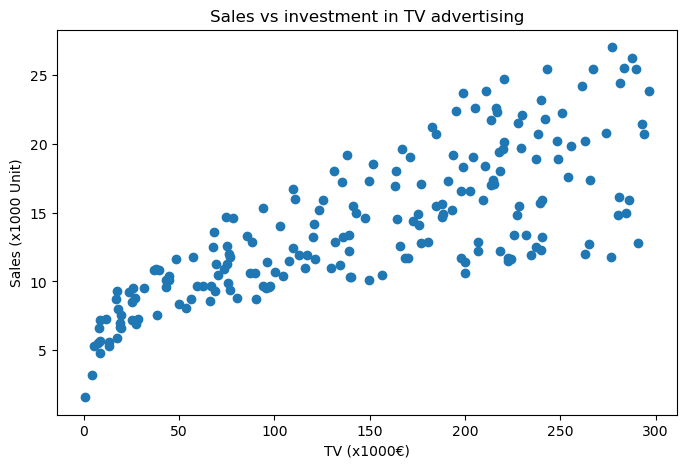

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')


Text(0.5, 1.0, 'Sales vs investment in Radio advertising')

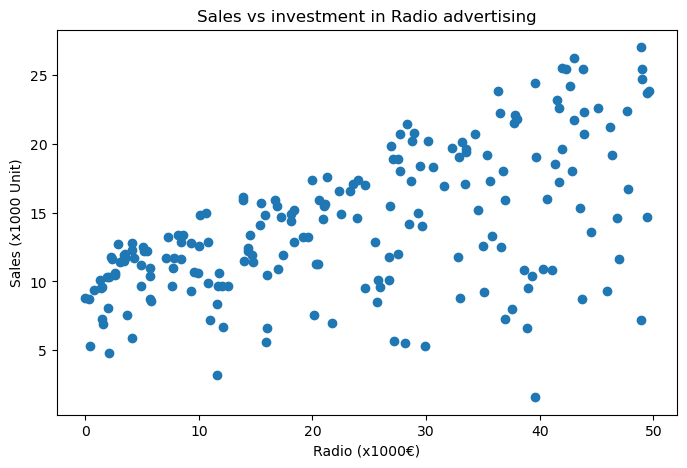

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Radio'].values, advertising['Sales'].values)
plt.xlabel("Radio (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Radio advertising')

Text(0.5, 1.0, 'Sales vs investment in Newspaper advertising')

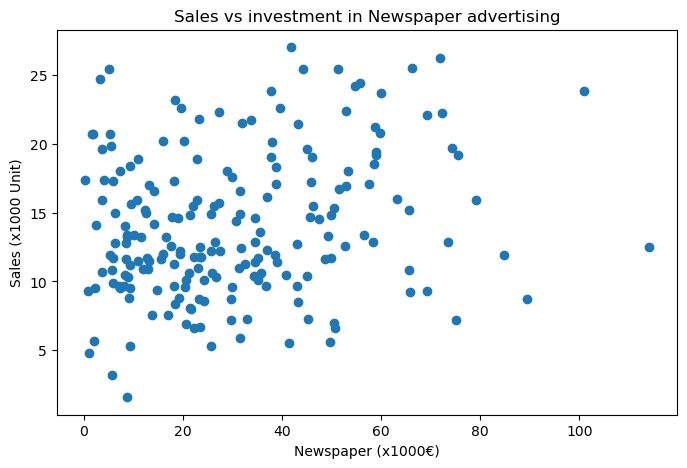

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Newspaper'].values, advertising['Sales'].values)
plt.xlabel("Newspaper (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Newspaper advertising')

Ricordiamo che Il nostro obiettivo è, dato un training set, per mezzo di un Learning Algorithm, individuare una funzione h: X → Y in modo che h (x) sia un “good” PREDICTOR.

Andiamo ad individuare il TRAINING SET

In [8]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
# creiamo il training set
# input features
x_train = advertising['TV'].values
x_train =x_train.reshape(-1,1)
# target
y_train = advertising['Sales'].values
y_train =y_train.reshape(-1,1)


In [343]:
y_train

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

Quante features abbiamo?

In [10]:
print(x_train.shape, y_train.shape)

(200, 1) (200, 1)


Ora dobbiamo effettuare il training sulla funzione

$h(x) = y = w_0 + w_1 x$

Il nostro modello è un modello di LINEAR REGRESSION con parametri $w_0, w_1$

Proviamo a plottare la nostra funzione sui dati che abbiamo a disposizione

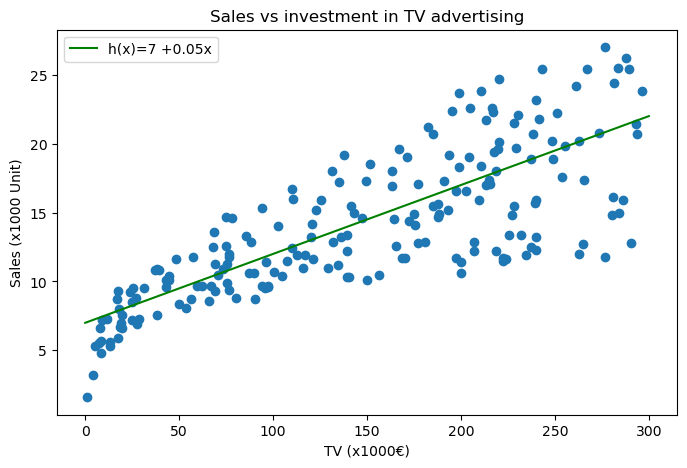

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')

def h(x, w0, w1):
    return w0+w1*x

# parametri
w0 = 7; w1 = 0.05
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-g', label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.legend()

Come facciamo a scegliere i parametri $w_0, w_1$ ?

Usiamo l'algoritmo di training

## Importiamo la classe **LinearRegression** dal modulo **sklearn**

In [15]:
from sklearn.linear_model import LinearRegression



CREIAMO IL MODELLO
Utilizziamo la funzione LinearRegression ()


In [16]:
model = LinearRegression()

(200, 1)

FACCIAMO IL TRAINING
Utilizziamo la funzione LinearRegression ()

In [17]:
model.fit(x_train, y_train)

LinearRegression()

In [18]:
model.coef_

array([[0.04753664]])

Quali valori dei parametri w0 e w1 ha calcolato il nostro learning algorithm?

In [19]:
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

print('Il valore di w0 è: ',w0)
print('Il valore di w1 è: ',w1)


Il valore di w0 è:  7.0325935491276885
Il valore di w1 è:  0.04753664043301979


Proviamo ora a plottare la nostra retta

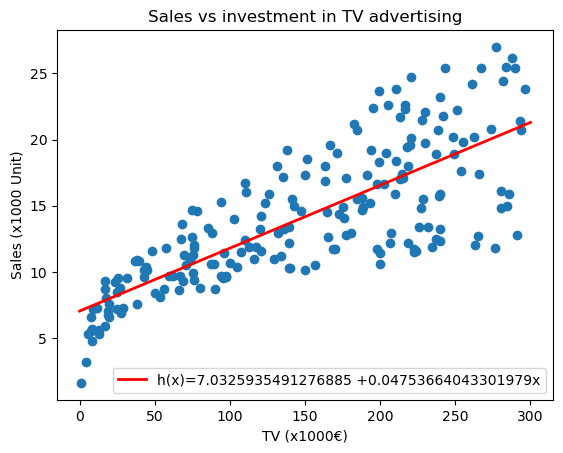

In [20]:
### plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.legend()

Proviamo ora a fare qualche PREVISIONE

Quante vendite riesco a fare se investo 134000€ in TV advertising? E se investo 230000€ ?

In [22]:
xp = np.array([134,230]).reshape(-1,1)
yp = model.predict(xp)

In [23]:
yp

array([[13.40250337],
       [17.96602085]])

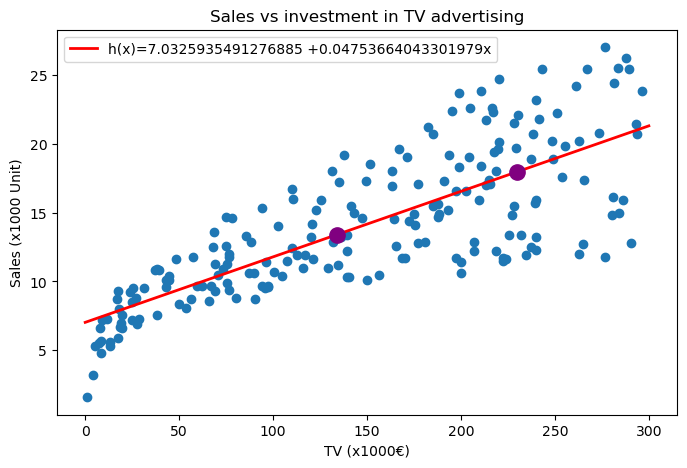

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')


plt.plot(xp,yp, 'o', color='purple', ms=11)

plt.legend()


# ORA PROVA TU. 
- Quante unità riesco a vendere con un investimento di 20000€ in radio? 
- Quante unità riesco a vendere con un investimento di 62000€ in newspaper? 